# Exploring Datasets with Python

In this short demo we will analyse a given dataset from 1978, which contains information about politicians having affairs. 

To analyse it, we will use a [Jupyter Notebook](http://jupyter.org/), which is basically a *REPL++* for Python. Entering a command with shift executes the line and prints the result.

## **Python Basic operations**

In [1]:
4 + 4

8

In [2]:
4  * 8 

32

In [3]:
5/2

2.5

In [4]:
5//2

2

In [5]:
def sum(a, b):
    return a + b

sum(40, 2)

42

# **Pandas**

To work with common files like CSV, JSON, Excel files etc., we will use [Pandas](http://pandas.pydata.org/), _an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language_™. Let's import it!

## Import the necessary libraries

In [6]:
import pandas as pd
import warnings
warnings.filterwarnings(action='once')

## Finding the version of pandas

In [52]:
pd.__version__

'1.4.3'

## Import the dataset

Our dataset is given as a CSV file. Pandas provides an easy way to read our file with `read_csv`. The path of the file to read is relative to our notebook file. The path can also be an URL, supporting HTTP, FTP and also S3 if your data is stored inside an AWS S3 Bucket!

In [8]:
affairs = pd.read_csv('affairs.csv')

# Exploring the dataset

The first thing we will check is the size of our dataset. We can use `info()` to get the number of entries of each column.

In [9]:
affairs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         601 non-null    object 
 1   age         601 non-null    float64
 2   ym          601 non-null    float64
 3   child       601 non-null    object 
 4   religious   601 non-null    int64  
 5   education   601 non-null    int64  
 6   occupation  601 non-null    int64  
 7   rate        601 non-null    int64  
 8   nbaffairs   601 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 42.4+ KB


## See the first 10 entries

Now we know how many data is inside our file. Pandas is smart enough to parse the column titles by itself and estimate the data types of each column.

You may be curious how the data looks like. Let's see by using `head()`, which will print the first 5 rows.

In [10]:
affairs.head()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
0,male,37.0,10.00,no,3,18,7,4,0
1,female,27.0,4.00,no,4,14,6,4,0
2,female,32.0,15.00,yes,1,12,1,4,0
3,male,57.0,15.00,yes,5,18,6,5,0
4,male,22.0,0.75,no,2,17,6,3,0


## See the last 5 entries

- Let's see by using `tail()`, which will print the last 5 rows.

In [11]:
affairs.tail()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
596,male,22.0,1.5,yes,1,12,2,5,1
597,female,32.0,10.0,yes,2,18,5,4,7
598,male,32.0,10.0,yes,2,17,6,5,2
599,male,22.0,7.0,yes,3,18,6,2,2
600,female,32.0,15.0,yes,3,14,1,5,1


## Number of observations in the dataset

In [12]:
("The number of observation are ",affairs.shape[0])

('The number of observation are ', 601)

## Number of columns in the dataset

In [13]:
("The number of Columns are ",affairs.shape[1])

('The number of Columns are ', 9)

## Name of all the columns

In [14]:
affairs.columns

Index(['sex', 'age', 'ym', 'child', 'religious', 'education', 'occupation',
       'rate', 'nbaffairs'],
      dtype='object')

## Checking the type of each column

In [15]:
affairs.dtypes

sex            object
age           float64
ym            float64
child          object
religious       int64
education       int64
occupation      int64
rate            int64
nbaffairs       int64
dtype: object

## Select a column by dtypes

In [16]:
# only select those have object type
affairs.select_dtypes(include=['object']).head()

,sex,child
0,male,no
1,female,no
2,female,yes
3,male,yes
4,male,no


In [17]:
affairs.select_dtypes(include=['number']).head()

,age,ym,religious,education,occupation,rate,nbaffairs
0,37.0,10.00,3,18,7,4,0
1,27.0,4.00,4,14,6,4,0
2,32.0,15.00,1,12,1,4,0
3,57.0,15.00,5,18,6,5,0
4,22.0,0.75,2,17,6,3,0


## Summarize the dataframes

In [18]:
affairs.describe()

,age,ym,religious,education,occupation,rate,nbaffairs
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,32.487521,8.177696,3.116473,16.166389,4.194676,3.931780,1.455907
std,9.288762,5.571303,1.167509,2.402555,1.819443,1.103179,3.298758
min,17.500000,0.125000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,27.000000,4.000000,2.000000,14.000000,3.000000,3.000000,0.000000
50%,32.000000,7.000000,3.000000,16.000000,5.000000,4.000000,0.000000
75%,37.000000,15.000000,4.000000,18.000000,6.000000,5.000000,0.000000
max,57.000000,15.000000,5.000000,20.000000,7.000000,5.000000,12.000000


In [19]:
affairs.describe(include = "all") #Notice: By default, only the numeric columns are returned.

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
count,601,601.000000,601.000000,601,601.000000,601.000000,601.000000,601.000000,601.000000
unique,2,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
top,female,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN
freq,315,NaN,NaN,430,NaN,NaN,NaN,NaN,NaN
mean,NaN,32.487521,8.177696,NaN,3.116473,16.166389,4.194676,3.931780,1.455907
std,NaN,9.288762,5.571303,NaN,1.167509,2.402555,1.819443,1.103179,3.298758
min,NaN,17.500000,0.125000,NaN,1.000000,9.000000,1.000000,1.000000,0.000000
25%,NaN,27.000000,4.000000,NaN,2.000000,14.000000,3.000000,3.000000,0.000000
50%,NaN,32.000000,7.000000,NaN,3.000000,16.000000,5.000000,4.000000,0.000000
75%,NaN,37.000000,15.000000,NaN,4.000000,18.000000,6.000000,5.000000,0.000000


# Value Counts

For categorical features like `sex`, you can also get the distributions of each value by using `value_counts()`.

In [20]:
affairs['sex'].value_counts()

female    315
male      286
Name: sex, dtype: int64

# Finding unique values in a datset

#####  we can also find out the unique values in a column by using `unique()`

In [21]:
affairs['sex'].unique()

array(['male', 'female'], dtype=object)

In [22]:
affairs['religious'].unique()

array([3, 4, 1, 5, 2], dtype=int64)

- nunique give the number of unique values in a religion column

In [23]:
affairs['religious'].nunique()

5

# Data Filtering

There is also an easy way to filter your dataset. Let's say we want to have a subset of our data containing only woman. This is also possible with the bracket notation!

In [24]:
affairs[affairs['sex'] == 'female'].head()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
1,female,27.0,4.00,no,4,14,6,4,0
2,female,32.0,15.00,yes,1,12,1,4,0
5,female,32.0,1.50,no,2,17,5,5,0
6,female,22.0,0.75,no,2,12,1,3,0
8,female,32.0,15.00,yes,4,16,1,2,0


The above statement returns a new dataframe (not a copy, modifying this data will modify the original as well), which can be accessed like before. Let's see how the numerical distribution is for our females.

In [25]:
affairs[affairs['sex'] == 'female'].describe()

,age,ym,religious,education,occupation,rate,nbaffairs
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,30.801587,8.017070,3.107937,15.257143,3.384127,3.939683,1.419048
std,8.646241,5.627237,1.134758,2.023879,1.929094,1.148045,3.309264
min,17.500000,0.125000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,22.000000,1.500000,2.000000,14.000000,1.000000,3.000000,0.000000
50%,27.000000,7.000000,3.000000,16.000000,4.000000,4.000000,0.000000
75%,37.000000,15.000000,4.000000,17.000000,5.000000,5.000000,0.000000
max,57.000000,15.000000,5.000000,20.000000,7.000000,5.000000,12.000000


In [26]:
# delete the duplicates in age column
affairs1 = affairs.drop_duplicates(['age'])

We can also create new rows. Specify the new column name in brackets and provide a function to set the data. We will create a new column containing True or False, wheather or not the person is below 30.

In [27]:
affairs['below_30'] = affairs['age'] < 30

In [28]:
affairs['below_30'].value_counts()

False    325
True     276
Name: below_30, dtype: int64

  - Here we can see that the number of people below 30 is 276

In [29]:
affairs.head()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs,below_30
0,male,37.0,10.00,no,3,18,7,4,0,False
1,female,27.0,4.00,no,4,14,6,4,0,True
2,female,32.0,15.00,yes,1,12,1,4,0,False
3,male,57.0,15.00,yes,5,18,6,5,0,False
4,male,22.0,0.75,no,2,17,6,3,0,True


We can use this to normalize our columns with better values. Take for example `religious`. The number have the following meaning: 1 = not, 2 = mildly, 3 = fairly, 4 = strongly. We can easily replace them inline with the following code.

In [30]:
rel_meanings = ['not', 'mildly', 'fairly', 'strongly']

In [31]:
affairs['religious'] = affairs['religious'].apply(lambda x: rel_meanings[min(x, 4)-1])

In [32]:
affairs.head()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs,below_30
0,male,37.0,10.00,no,fairly,18,7,4,0,False
1,female,27.0,4.00,no,strongly,14,6,4,0,True
2,female,32.0,15.00,yes,not,12,1,4,0,False
3,male,57.0,15.00,yes,strongly,18,6,5,0,False
4,male,22.0,0.75,no,mildly,17,6,3,0,True


### Filtering by large categories
- In this tip we will see how we can filter a dataset by large categories.

- We can filter a dataset by large categories using the `.nlargest()` method.

In [33]:
affairs.age.value_counts().nlargest(3)

27.0    153
22.0    117
32.0    115
Name: age, dtype: int64

In [34]:
# This will provide the value counts of three largset value in religious column
counts = affairs.religious.value_counts()
counts.nlargest(3)

strongly    260
mildly      164
fairly      129
Name: religious, dtype: int64

## Sorting

In [35]:
affairs.sort_values(by = "age")

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs,below_30
540,female,17.5,0.75,yes,mildly,12,1,3,12,True
419,female,17.5,10.00,no,strongly,14,4,5,0,True
80,male,17.5,1.50,yes,fairly,18,6,5,0,True
305,female,17.5,0.75,no,mildly,18,5,4,0,True
571,female,17.5,0.75,yes,mildly,12,3,5,12,True
...,...,...,...,...,...,...,...,...,...,...
107,male,57.0,15.00,yes,strongly,20,5,4,0,False
512,female,57.0,15.00,yes,not,18,5,4,2,False
371,male,57.0,15.00,yes,strongly,18,5,2,0,False
364,male,57.0,15.00,yes,strongly,17,5,5,0,False


This should be enought about Pandas. Let's get some visualisations!

## Visualize Data

To visualize our data, we will use [Seaborn](https://seaborn.pydata.org), a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. Let's import it.

In [36]:
import seaborn as sns

f:\Minniconda\envs\stock\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
f:\Minniconda\envs\stock\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


To see our charts directly in our notebook, we have to execute the following:

In [37]:
%matplotlib inline
sns.set()
sns.set_context('talk')

f:\Minniconda\envs\stock\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
f:\Minniconda\envs\stock\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


Seaborn together with Pandas makes it pretty easy to create charts to analyze our data. We can pass our Dataframes and Series directly into Seaborn methods. We will see how in the following sections.

### Univariate Plotting

Let's start by visualizing the distribution of the age our our people. We can achieve this with a simple method called `displot` by passing our series of ages as argument.

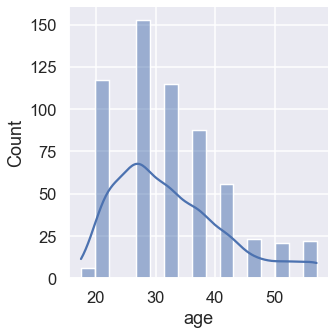

In [38]:
sns.displot(affairs['age'], kde=True)

The chart above calculates a kernel density as well. To get a real histogram, we have to disable the `kde` feature. We can also increase the number of buckets for our histogram by setting `bins` to a higher number.

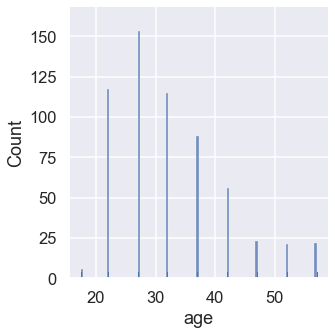

In [39]:
sns.displot(x=affairs['age'], bins=100, rug=True, kde=False)

Interesting! The ages of the people in this dataset seem to end with two or seven.

We can do the same for every numerical column, e.g. the years of marriage.

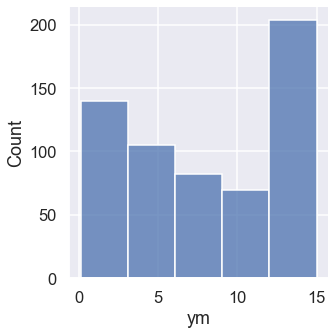

In [40]:
sns.displot(affairs['ym'], bins=5, kde=False)

The average age of our people is around 32, but the most people are married for more than 14 years!

### Bivariate Plotting

Numbers get even more interesting when we can compare them to other numbers! Lets start comparing the number of years married vs the number of affairs. Seaborn provides us with a method called `jointplot` for this use case.

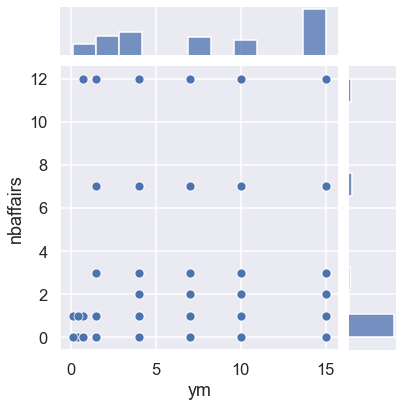

In [41]:
sns.jointplot(x=affairs['ym'],y=affairs['nbaffairs'])

To get a better feeling of how the number of affairs is affected by the number of years married, we can use a regression model by specifying `kind` as `reg`.

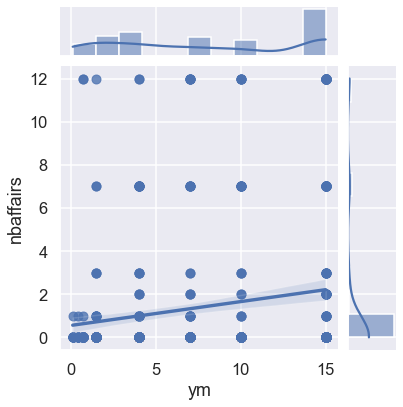

In [42]:
sns.jointplot(x=affairs['ym'], y=affairs['nbaffairs'], kind='reg')

We can also use a kernel to kompare the density of two columns against each other, e.g. `age` and `ym`.

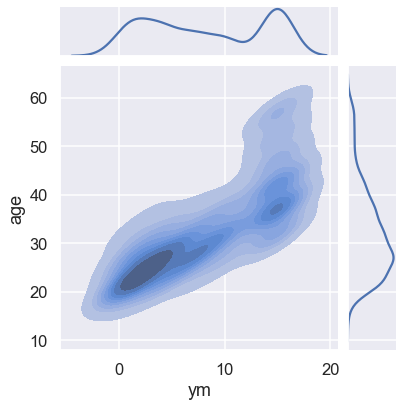

In [43]:
sns.jointplot(x=affairs['ym'], y=affairs['age'], kind='kde', shade=True)

We can get an even better comparison by plotting everything vs everything! Seaborn provides this with the `pairplot` method.

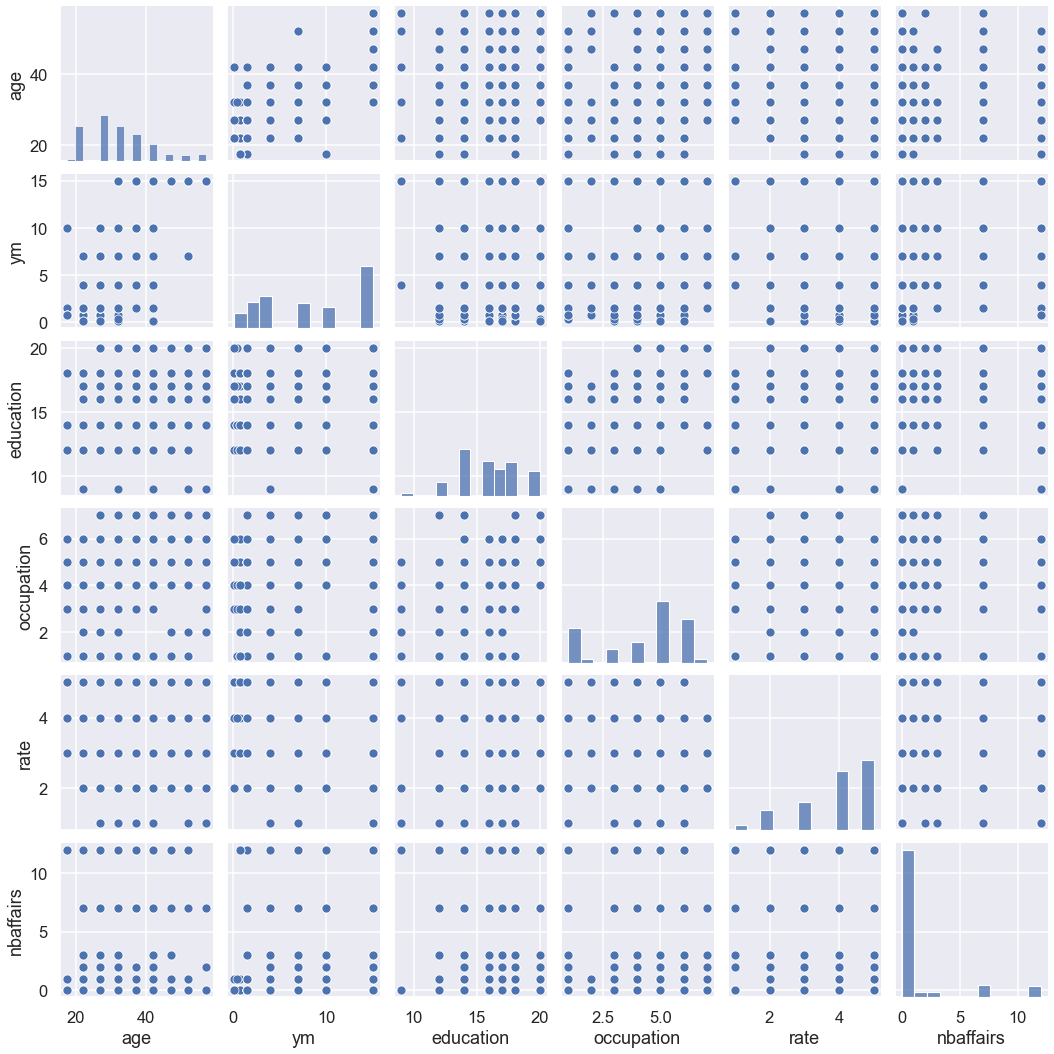

In [44]:
sns.pairplot(affairs.drop("below_30", axis=1))

You won't see any special in this data. We need to separate them by some kind of criteria. We can use our categorical values to do this! Seaborn uses a parameter called `hue` to do this. Let's separate our data by `sex` first. To make things even more interesting, let's create a regression for every plot, too!

f:\Minniconda\envs\stock\lib\site-packages\seaborn\axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):


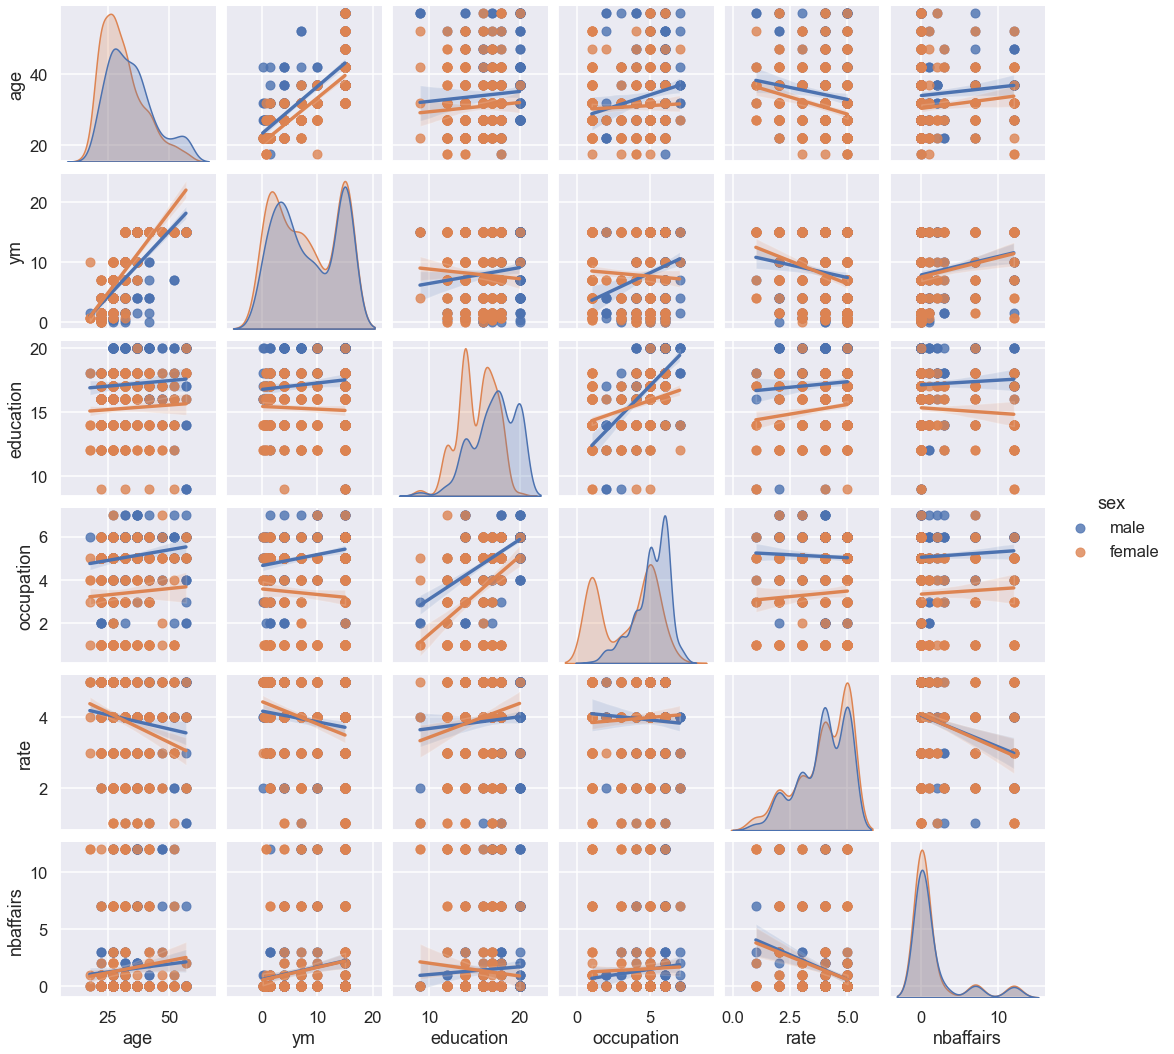

In [45]:
sns.pairplot(affairs.drop('below_30', axis=1), hue='sex', kind='reg')

To get even better separation, we can use `lmplot` to compare just the fields we need.

Let's say we're interested in the number of affairs vs years married. We also whant to separate them by `sex`, `child` and `religious`. We will use `sns.lmplot(x="ym", y="nbaffairs", hue="sex", col="child", row="religious", data=affairs)` to achieve this.

f:\Minniconda\envs\stock\lib\site-packages\seaborn\axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):


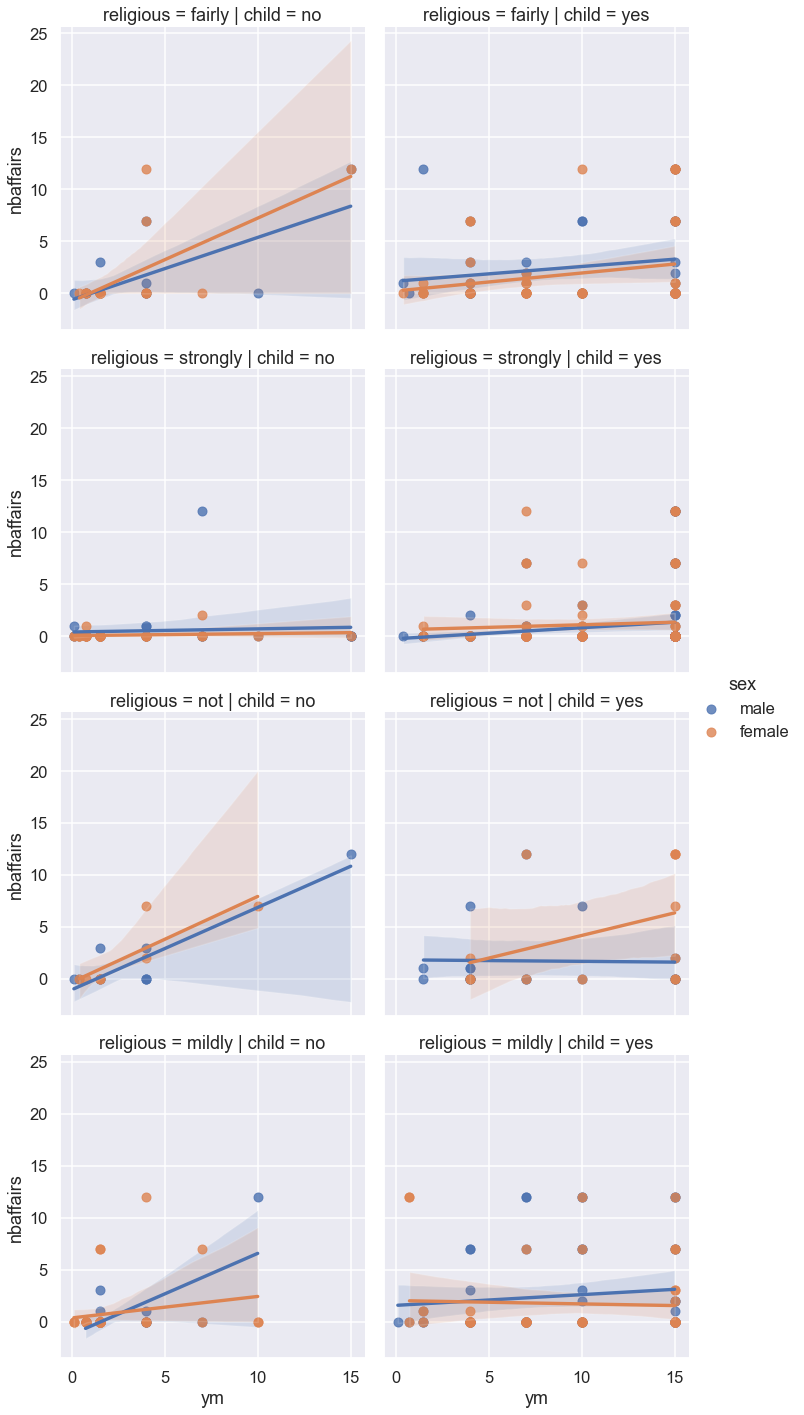

In [46]:
sns.lmplot(x="ym", y="nbaffairs", hue="sex", col="child", row="religious", data=affairs)

Here are some categorical plots to explore the dataset even further.

f:\Minniconda\envs\stock\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
f:\Minniconda\envs\stock\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


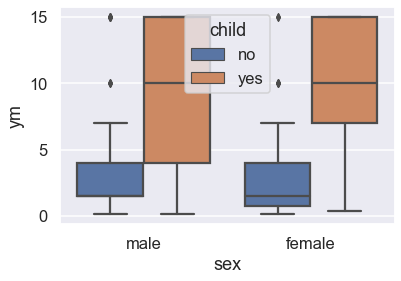

In [47]:
sns.boxplot(x="sex", y="ym", hue="child", data=affairs);

f:\Minniconda\envs\stock\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
f:\Minniconda\envs\stock\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


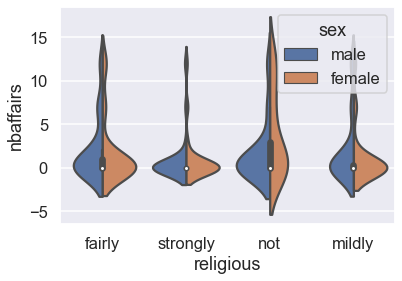

In [48]:
sns.violinplot(x="religious", y="nbaffairs", hue="sex", data=affairs, split=True);

We can also get the correlations between the values by using Pandas builtin method `corr()`.

In [49]:
affairs.corr()

,age,ym,education,occupation,rate,nbaffairs,below_30
age,1.000000,0.777546,0.134596,0.166413,-0.199000,0.095237,-0.775833
ym,0.777546,1.000000,0.040003,0.044592,-0.243119,0.186842,-0.763049
education,0.134596,0.040003,1.000000,0.533605,0.109303,-0.002437,-0.144546
occupation,0.166413,0.044592,0.533605,1.000000,0.017422,0.049612,-0.146437
rate,-0.199000,-0.243119,0.109303,0.017422,1.000000,-0.279512,0.181229
nbaffairs,0.095237,0.186842,-0.002437,0.049612,-0.279512,1.000000,-0.149754
below_30,-0.775833,-0.763049,-0.144546,-0.146437,0.181229,-0.149754,1.000000


Feed these stats into Seaborns `heatmap` method will provide us with the visual representation.

<AxesSubplot:>

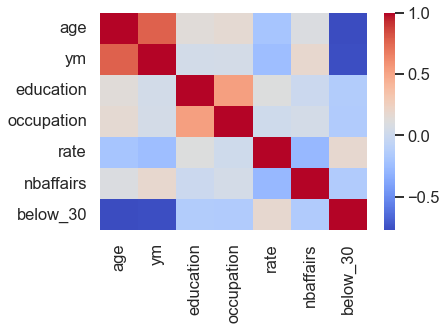

In [50]:
sns.heatmap(affairs.corr(), cmap='coolwarm')

In [51]:
affairs.head(3)

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs,below_30
0,male,37.0,10.0,no,fairly,18,7,4,0,False
1,female,27.0,4.0,no,strongly,14,6,4,0,True
2,female,32.0,15.0,yes,not,12,1,4,0,False
